<a href="https://colab.research.google.com/github/ClovisMallmann/XP_Projeto_Aplicado/blob/main/XP_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
#Carregamendo do Google drive para leitura dos Datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# **1 - Carregamento dos dados e Tratamento**

In [219]:
tab_comportamentos = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_comportamentos.xlsx')
tab_fraldas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_fraldas.csv', sep=';')
tab_medicamentos_xls = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_medicamentos.xlsx')

In [220]:
tab_comportamentos.head(10)

,DATA,c_a
0,2023-01-02,1
1,2023-01-03,1
2,2023-01-04,1
3,2023-01-05,0
4,2023-01-06,0
5,2023-01-07,1
6,2023-01-08,0
7,2023-01-09,0
8,2023-01-10,1
9,2023-01-11,0


In [221]:
tab_fraldas.head(10)


,DATA,f_1,f_2
0,02/01/2023,4,1
1,03/01/2023,3,1
2,04/01/2023,3,1
3,05/01/2023,3,1
4,06/01/2023,4,1
5,07/01/2023,4,1
6,08/01/2023,3,1
7,09/01/2023,4,1
8,10/01/2023,4,1
9,11/01/2023,3,1


In [222]:
tab_medicamentos_xls.head(10)

,DATA,m_1,m_2,m_3,m_4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2023-01-02,1,1,0,1,NaN,NaN,NaN,NaN,NaN
1,2023-01-03,1,1,0,1,NaN,NaN,NaN,NaN,NaN
2,2023-01-04,1,1,0,1,NaN,NaN,NaN,NaN,NaN
3,2023-01-05,1,1,0,1,NaN,NaN,NaN,NaN,NaN
4,2023-01-06,1,1,0,1,NaN,NaN,NaN,NaN,NaN
5,2023-01-07,1,1,0,1,NaN,NaN,NaN,NaN,NaN
6,2023-01-08,1,1,0,1,NaN,NaN,NaN,NaN,NaN
7,2023-01-09,1,1,0,1,NaN,NaN,NaN,NaN,NaN
8,2023-01-10,1,1,0,1,NaN,NaN,NaN,NaN,/
9,2023-01-11,1,1,0,1,NaN,NaN,NaN,NaN,NaN


In [223]:
#Excluindo as colunas desnecessárias

tab_medicamentos_xls = tab_medicamentos_xls.drop(columns=['Unnamed: 5', 'Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'])
tab_medicamentos_xls.head(10)

,DATA,m_1,m_2,m_3,m_4
0,2023-01-02,1,1,0,1
1,2023-01-03,1,1,0,1
2,2023-01-04,1,1,0,1
3,2023-01-05,1,1,0,1
4,2023-01-06,1,1,0,1
5,2023-01-07,1,1,0,1
6,2023-01-08,1,1,0,1
7,2023-01-09,1,1,0,1
8,2023-01-10,1,1,0,1
9,2023-01-11,1,1,0,1


In [224]:
#Tratando a coluna DATA das tabelas para posteriormente,
#concatenar e formar uma base de dados só.


tab_comportamentos["DATA"]= pd.to_datetime(tab_comportamentos["DATA"])
tab_comportamentos["DATA"].dt.strftime('%Y-%m-%d')

tab_fraldas["DATA"]= pd.to_datetime(tab_fraldas["DATA"])
tab_comportamentos["DATA"].dt.strftime('%Y-%m-%d')


<ipython-input-224-44cb69eb494a>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  tab_fraldas["DATA"]= pd.to_datetime(tab_fraldas["DATA"])


0      2023-01-02
1      2023-01-03
2      2023-01-04
3      2023-01-05
4      2023-01-06
          ...    
462    2024-04-08
463    2024-04-09
464    2024-04-10
465    2024-04-11
466    2024-04-12
Name: DATA, Length: 467, dtype: object

# **1.1 - Unindo as tabelas.**

In [225]:

df_a = pd.merge(tab_comportamentos, tab_fraldas, on=['DATA'], how='inner')
df_a

,DATA,c_a,f_1,f_2
0,2023-01-02,1,4,1
1,2023-01-03,1,4,1
2,2023-01-04,1,3,1
3,2023-01-05,0,4,1
4,2023-01-06,0,4,1
...,...,...,...,...
430,2024-03-31,1,5,1
431,2024-04-01,0,4,2
432,2024-04-02,0,4,1
433,2024-04-03,0,5,1


In [226]:
Dados = pd.merge(df_a, tab_medicamentos_xls, on=['DATA'], how='inner')
Dados.head(10)

,DATA,c_a,f_1,f_2,m_1,m_2,m_3,m_4
0,2023-01-02,1,4,1,1,1,0,1
1,2023-01-03,1,4,1,1,1,0,1
2,2023-01-04,1,3,1,1,1,0,1
3,2023-01-05,0,4,1,1,1,0,1
4,2023-01-06,0,4,1,1,1,0,1
5,2023-01-07,1,4,1,1,1,0,1
6,2023-01-08,0,4,1,1,1,0,1
7,2023-01-09,0,4,1,1,1,0,1
8,2023-01-10,1,4,2,1,1,0,1
9,2023-01-11,0,4,1,1,1,0,1


In [227]:
#Renomeando as colunas
Dados.columns=['Mes',	'Anormal','f_1',	'f_2',	'm_1',	'm_2',	'm_3',	'm_4']

In [228]:
Dados

,Mes,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
0,2023-01-02,1,4,1,1,1,0,1
1,2023-01-03,1,4,1,1,1,0,1
2,2023-01-04,1,3,1,1,1,0,1
3,2023-01-05,0,4,1,1,1,0,1
4,2023-01-06,0,4,1,1,1,0,1
...,...,...,...,...,...,...,...,...
430,2024-03-31,1,5,1,1,1,0,1
431,2024-04-01,0,4,2,1,1,0,1
432,2024-04-02,0,4,1,1,1,0,1
433,2024-04-03,0,5,1,1,1,0,1


# **1.2 - Tratando a coluna Mês**

In [229]:
#Indexando
Dados.index = Dados['Mes']

In [230]:
#Após o index, dropando a coluna duplicada
Dados = Dados.drop(columns=['Mes'])

In [231]:
#Modificando o DF
Dados = Dados.groupby(pd.Grouper(freq='M')).sum()

In [232]:
#Verificando
Dados.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,
2023-01-31,8,110,31,30,30,0,30
2023-02-28,0,100,29,28,28,0,28
2023-03-31,5,105,32,31,31,0,31
2023-04-30,6,105,31,30,30,0,30
2023-05-31,7,107,32,31,31,0,31
2023-06-30,7,105,31,30,30,0,30
2023-07-31,8,111,32,31,31,0,31
2023-08-31,0,110,32,31,31,0,31
2023-09-30,12,105,31,30,30,0,30


# **1.3 - Modificações na coluna Mês: de Data completa para somente o Mês**

In [233]:
#Criando uma lista com meses

Meses = ['Jan23','Fev23','Mar23','Abr23','Mai23','Jun23','Jul23','Ago23','Set23','Out23','Nov23','Dez23','Jan24','Fev24','Mar24','Abr24']

In [234]:
#Inserindo a nova coluna com os Meses
Dados.insert(0,'Meses',Meses,True)

In [235]:
Dados.head(20)

,Meses,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,,
2023-01-31,Jan23,8,110,31,30,30,0,30
2023-02-28,Fev23,0,100,29,28,28,0,28
2023-03-31,Mar23,5,105,32,31,31,0,31
2023-04-30,Abr23,6,105,31,30,30,0,30
2023-05-31,Mai23,7,107,32,31,31,0,31
2023-06-30,Jun23,7,105,31,30,30,0,30
2023-07-31,Jul23,8,111,32,31,31,0,31
2023-08-31,Ago23,0,110,32,31,31,0,31
2023-09-30,Set23,12,105,31,30,30,0,30


In [236]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2023-01-31 to 2024-04-30
Freq: M
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Meses    16 non-null     object
 1   Anormal  16 non-null     int64 
 2   f_1      16 non-null     int64 
 3   f_2      16 non-null     int64 
 4   m_1      16 non-null     int64 
 5   m_2      16 non-null     int64 
 6   m_3      16 non-null     int64 
 7   m_4      16 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.1+ KB


In [237]:
#Removendo o a coluna INDEX
Dados = Dados.reset_index(drop=True)

In [238]:
Dados = Dados.set_index('Meses')

# **1.4 - Prontificando o DF para estudos**

In [239]:
#Verificando
Dados.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,8,110,31,30,30,0,30
Fev23,0,100,29,28,28,0,28
Mar23,5,105,32,31,31,0,31
Abr23,6,105,31,30,30,0,30
Mai23,7,107,32,31,31,0,31
Jun23,7,105,31,30,30,0,30
Jul23,8,111,32,31,31,0,31
Ago23,0,110,32,31,31,0,31
Set23,12,105,31,30,30,0,30


# **2 - Testando Gráficos**

<Axes: >

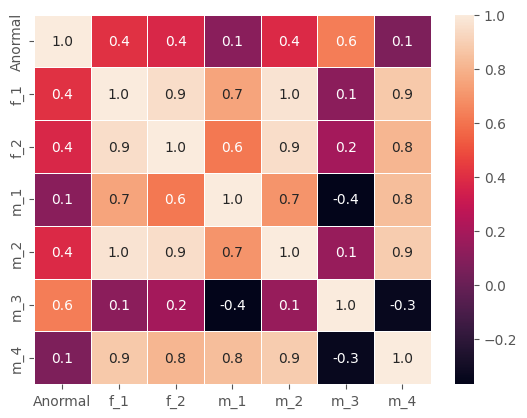

In [240]:
#teste = Dados.corr()
mapa_calor = sns.heatmap(Dados.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)
mapa_calor

In [241]:
Dados.describe()

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
count,16.000000,16.000000,16.000000,16.0000,16.00000,16.0000,16.000000
mean,6.562500,98.375000,28.875000,27.6250,27.18750,0.9375,26.312500
std,4.426718,22.896506,7.098122,7.6844,7.01635,3.7500,7.373093
min,0.000000,17.000000,5.000000,4.0000,4.00000,0.0000,4.000000
25%,4.750000,99.250000,30.500000,27.7500,26.75000,0.0000,23.000000
50%,7.000000,105.000000,31.000000,30.0000,30.00000,0.0000,30.000000
75%,8.000000,108.500000,32.000000,31.0000,31.00000,0.0000,31.000000
max,17.000000,114.000000,34.000000,38.0000,31.00000,15.0000,31.000000


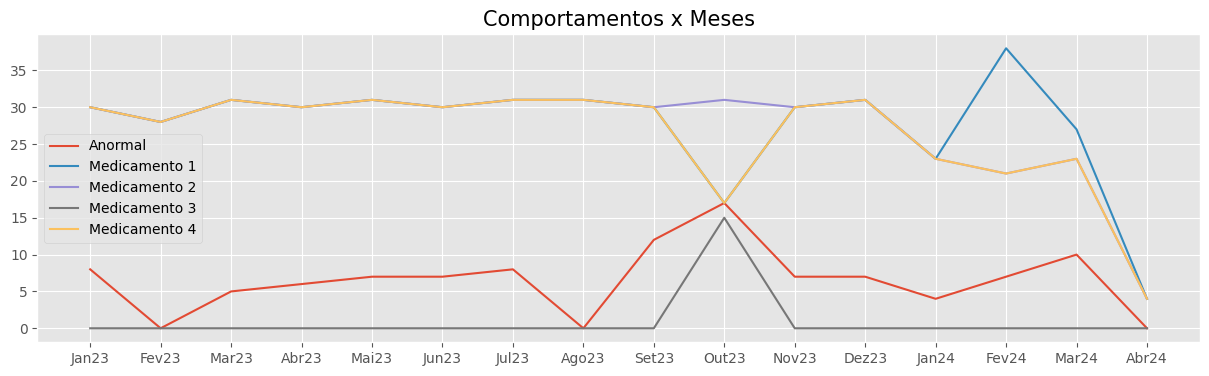

In [243]:
#Hsitograma de 1 coluna
#Dados.hist('c_1', figsize=(10,5), bins=10, facecolor='green',alpha=0.5)
#plt.show()

Dados_sem_index = pd.DataFrame(Dados.reset_index())

plt.subplots(figsize=(15,4))
plt.title("Comportamentos x Meses", fontsize=15)
plt.plot(Dados_sem_index['Meses'], Dados_sem_index['Anormal'],label='Anormal')
plt.plot(Dados_sem_index['Meses'], Dados_sem_index['m_1'],label='Medicamento 1')
plt.plot(Dados_sem_index['Meses'], Dados_sem_index['m_2'],label='Medicamento 2')
plt.plot(Dados_sem_index['Meses'], Dados_sem_index['m_3'],label='Medicamento 3')
plt.plot(Dados_sem_index['Meses'], Dados_sem_index['m_4'],label='Medicamento 4')

plt.legend()
plt.show()

# **Analisando mais de perto o comportamento Anormal  +  Medicamento 4  + Medicamento 3**

In [268]:
Dados.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,8,110,31,30,30,0,30
Fev23,0,100,29,28,28,0,28
Mar23,5,105,32,31,31,0,31
Abr23,6,105,31,30,30,0,30
Mai23,7,107,32,31,31,0,31
Jun23,7,105,31,30,30,0,30
Jul23,8,111,32,31,31,0,31
Ago23,0,110,32,31,31,0,31
Set23,12,105,31,30,30,0,30


<Axes: >

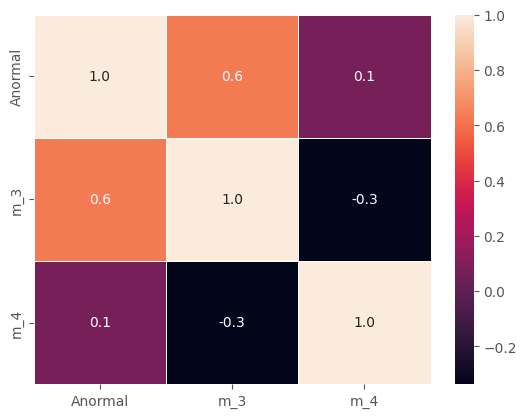

In [267]:
sns.heatmap(Dados.drop(columns=['f_1','f_2','m_1','m_2']).corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)